In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
files = glob.glob('../CONTPEAKS/SA/*.csv')
files.sort()
#Number of Trials
trials = 3
#File name beginining
nb = 26
#File name ending
ne = -10
#Output file
name = '../CONTPEAKS/contpeaks.csv'
#Range
r = [5,10,50,100,200,300,400,500]

In [13]:
files

['../CONTPEAKS/SA/CONTPEAKS_SA0.15_1_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.15_2_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.15_3_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.35_1_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.35_2_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.35_3_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.55_1_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.55_2_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.55_3_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.75_1_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.75_2_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.75_3_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.95_1_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.95_2_LOG.csv',
 '../CONTPEAKS/SA/CONTPEAKS_SA0.95_3_LOG.csv']

In [14]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [15]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

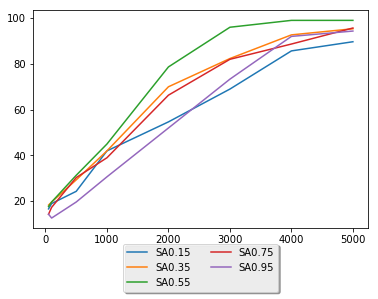

In [16]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

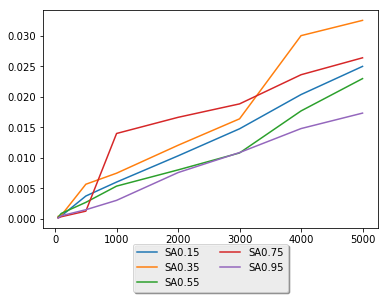

In [17]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [18]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 SA0.15
1 SA0.35
2 SA0.55
3 SA0.75
4 SA0.95


In [19]:
#Change this
df = df_concats[2]
df

,iterations,fitness,time,fevals
5,50,17.666667,0.000295,61
10,100,19.666667,0.000909,111
50,500,31.333333,0.002722,511
100,1000,45.000000,0.005382,1011
200,2000,78.666667,0.008037,2011
300,3000,96.000000,0.010816,3011
400,4000,99.000000,0.017696,4011
500,5000,99.000000,0.022988,5011


In [20]:
with open(name, 'a') as f:
    f.write('#Simulated Annealing\n')
    
df.to_csv(name, sep=',', mode='a', header=True)